In [3]:
import os
#import vmo
#import librosa
import numpy as np
import pretty_midi

import matplotlib.pyplot as plt 

%matplotlib inline

/Users/EJ/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [5]:
midi_file = '/Users/EJ/dev/vmo/bin/files/midi/parker_omnibook/now_s_the_time.mid'
midi = pretty_midi.PrettyMIDI(midi_file) 

In [6]:
print midi.instruments

[Instrument(program=32, is_drum=False, name="Bass    (BB) "), Instrument(program=0, is_drum=True, name="Drums   (BB) "), Instrument(program=0, is_drum=False, name="Piano   (BB) ")]


In [20]:
m = midi.instruments[0].get_piano_roll(fs=1000)

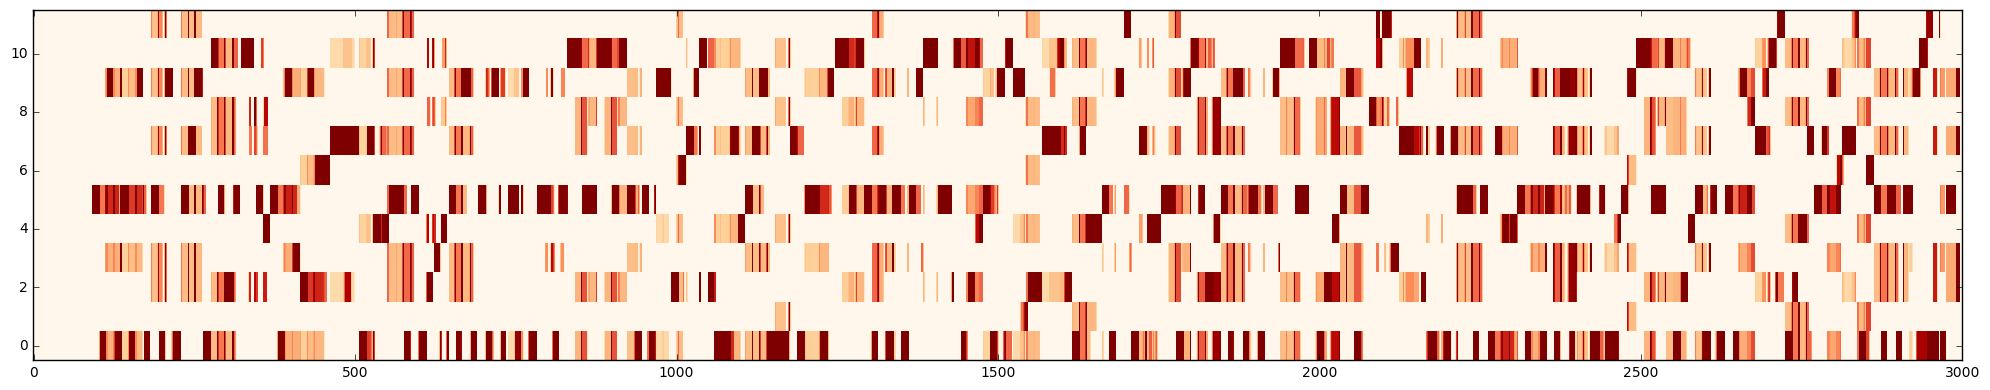

In [28]:
# chroma matrix - the energy in each semitone across octaves
chroma_midi = midi.get_chroma(times=np.arange(0, midi.get_end_time(), 1/25.0))

# normalize chroma_matrix columnwise by max
chroma_midi /= (chroma_midi.max(axis=0) + (chroma_midi.max(axis=0) == 0))

plt.figure(figsize=(20,4))
plt.imshow(chroma_midi, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.OrRd)
plt.tight_layout()
plt.show();

In [29]:
chroma_midi.shape[1]

3000

In [31]:
midi.get_end_time()

119.99987999999999

In [33]:
midi.get_beats()

array([   0.      ,    0.461538,    0.923076,    1.384614,    1.846152,
          2.30769 ,    2.769228,    3.230766,    3.692304,    4.153842,
          4.61538 ,    5.076918,    5.538456,    5.999994,    6.461532,
          6.92307 ,    7.384608,    7.846146,    8.307684,    8.769222,
          9.23076 ,    9.692298,   10.153836,   10.615374,   11.076912,
         11.53845 ,   11.999988,   12.461526,   12.923064,   13.384602,
         13.84614 ,   14.307678,   14.769216,   15.230754,   15.692292,
         16.15383 ,   16.615368,   17.076906,   17.538444,   17.999982,
         18.46152 ,   18.923058,   19.384596,   19.846134,   20.307672,
         20.76921 ,   21.230748,   21.692286,   22.153824,   22.615362,
         23.0769  ,   23.538438,   23.999976,   24.461514,   24.923052,
         25.38459 ,   25.846128,   26.307666,   26.769204,   27.230742,
         27.69228 ,   28.153818,   28.615356,   29.076894,   29.538432,
         29.99997 ,   30.461508,   30.923046,   31.384584,   31.

In [38]:
midi_chroma_length = midi.get_end_time()/ chroma_midi.shape[1]
beat_positions = midi.get_beats().tolist()
beat_positions.append(midi.get_end_time())
midi_chroma_beat_indeces = []
midi_chroma_idx = 0

In [39]:
for i in range(chroma_midi.shape[1]):

    if i * midi_chroma_length >= beat_positions[midi_chroma_idx]:
        midi_chroma_beat_indeces.append(i)
        midi_chroma_idx += 1

    if midi_chroma_idx >= len(beat_positions):
        print "!!!"
        break

np.asarray(midi_chroma_beat_indeces)

array([   0,   12,   24,   35,   47,   58,   70,   81,   93,  104,  116,
        127,  139,  150,  162,  174,  185,  197,  208,  220,  231,  243,
        254,  266,  277,  289,  300,  312,  324,  335,  347,  358,  370,
        381,  393,  404,  416,  427,  439,  450,  462,  474,  485,  497,
        508,  520,  531,  543,  554,  566,  577,  589,  601,  612,  624,
        635,  647,  658,  670,  681,  693,  704,  716,  727,  739,  751,
        762,  774,  785,  797,  808,  820,  831,  843,  854,  866,  877,
        889,  900,  912,  924,  935,  947,  958,  970,  981,  993, 1004,
       1016, 1027, 1039, 1050, 1062, 1074, 1085, 1097, 1108, 1120, 1131,
       1143, 1154, 1166, 1177, 1189, 1200, 1212, 1224, 1235, 1247, 1258,
       1270, 1281, 1293, 1304, 1316, 1327, 1339, 1350, 1362, 1374, 1385,
       1397, 1408, 1420, 1431, 1443, 1454, 1466, 1477, 1489, 1500, 1512,
       1524, 1535, 1547, 1558, 1570, 1581, 1593, 1604, 1616, 1627, 1639,
       1650, 1662, 1674, 1685, 1697, 1708, 1720, 17

/Users/EJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


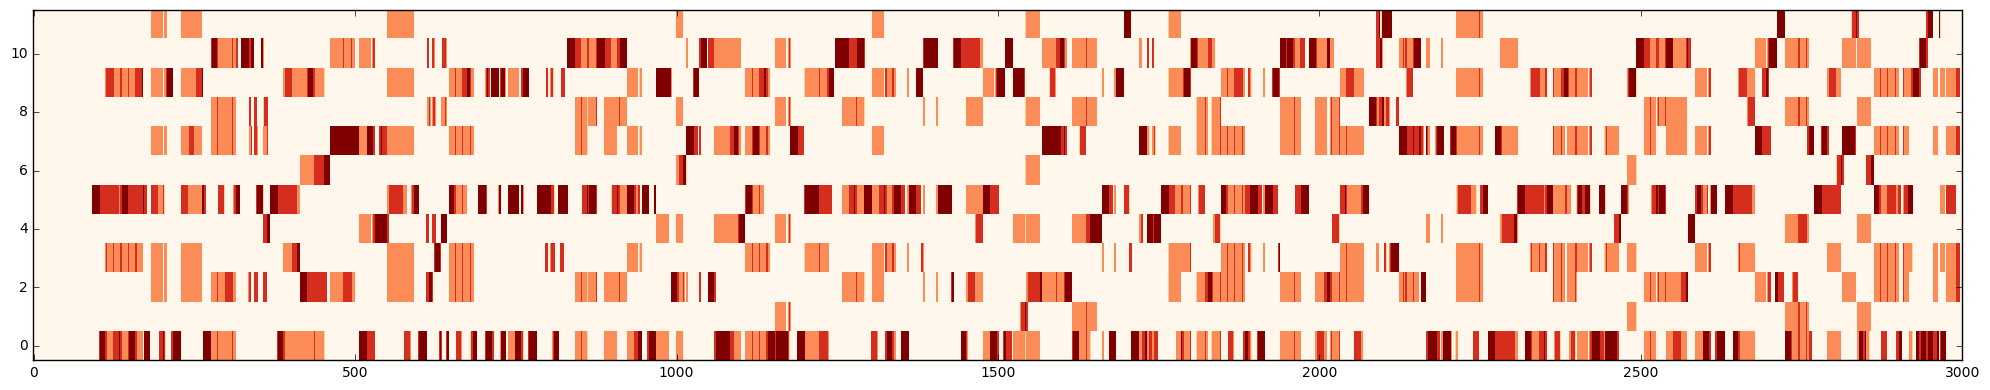

In [41]:
## chroma energy distribution

chroma_midi_norm = chroma_midi / np.sum(chroma_midi, axis=0)
chroma_midi_norm = np.nan_to_num(chroma_midi_norm)

CENS_midi = np.zeros(tuple(chroma_midi.shape[0:2])) 

CENS_midi[np.where(chroma_midi_norm > 0.4)] = 4
CENS_midi[np.where((chroma_midi_norm >= 0.2) & (chroma_midi_norm <= 0.4))] = 3
CENS_midi[np.where((chroma_midi_norm >= 0.1) & (chroma_midi_norm < 0.2))]  = 2
CENS_midi[np.where((chroma_midi_norm >= 0.05) & (chroma_midi_norm < 0.1))]  = 1
CENS_midi[np.where(chroma_midi_norm < 0.05)]  = 0

plt.figure( figsize=(20, 4) )
plt.imshow( CENS_midi, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.OrRd )
plt.tight_layout()
plt.show()

/Users/EJ/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in divide


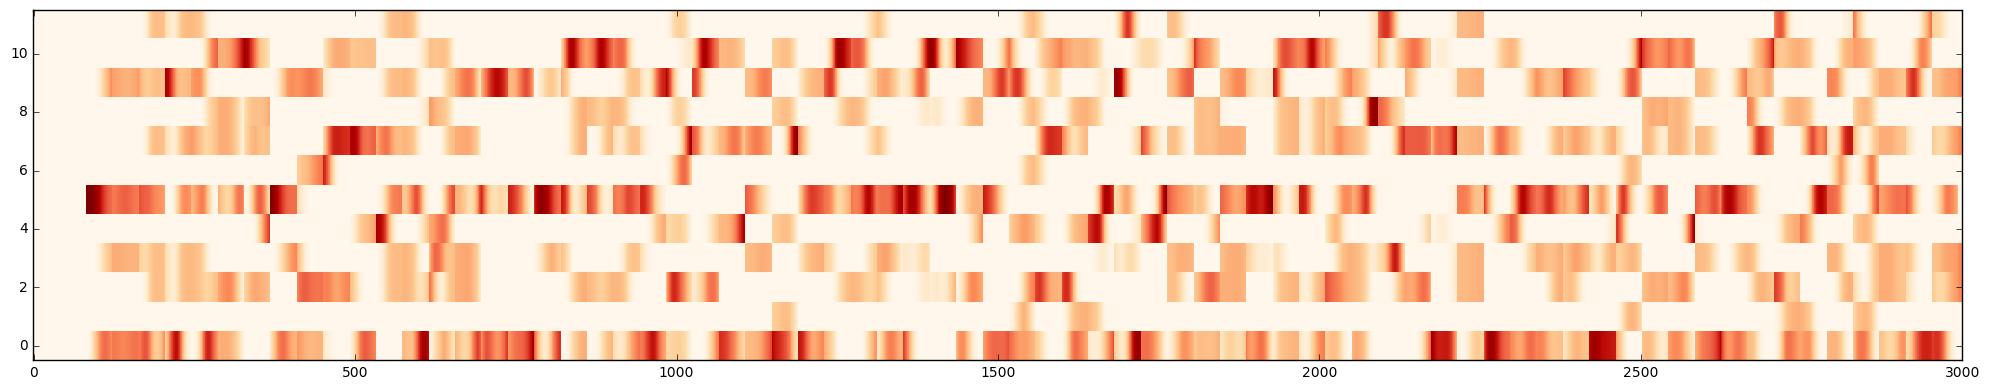

In [42]:
CENS_midi_hann = np.zeros(tuple(CENS_midi.shape[0:2]))

for i in range(12):
    for j in np.arange(0,CENS_midi.shape[1],41):
        CENS_midi_hann[i,j:j+41] = np.convolve(CENS_midi[i,j:j+41],np.hanning(41)[0:CENS_midi[i,j:j+41].shape[0]],'same')

CENS_midi_hann /= np.linalg.norm(CENS_midi_hann,2,axis=0)
CENS_midi_hann = np.nan_to_num(CENS_midi_hann)

plt.figure(figsize=(20, 4))
plt.imshow(CENS_midi_hann, origin='lower', aspect='auto', interpolation='nearest', cmap=plt.cm.OrRd)
plt.tight_layout()
plt.show()

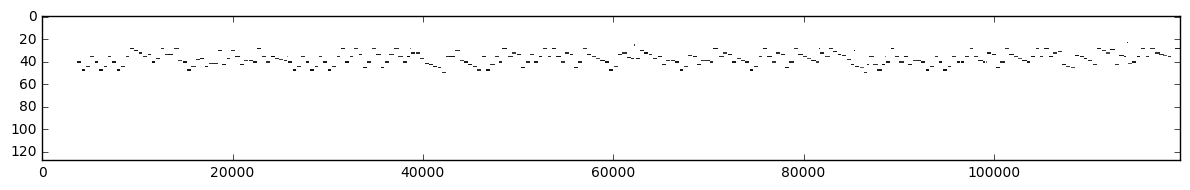

In [22]:
plt.figure(figsize=(12,2))
plt.imshow(m, interpolation='nearest', aspect='auto', cmap='Greys')
plt.tight_layout()

In [25]:
print midi.instruments[0].get_chroma

<bound method Instrument.get_chroma of Instrument(program=32, is_drum=False, name="Bass    (BB)>
